In [1]:
# PCA – porównanie wyników z i bez autoskalowania na zbiorze Wine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# =============================
# 1. Wczytanie danych
# =============================
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='class')

print("Dane wejściowe:\n", X.head())

Dane wejściowe:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0 


PCA bez skalowania – opis zmienności (%):
[9.981e+01 1.700e-01 1.000e-02 1.000e-02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]


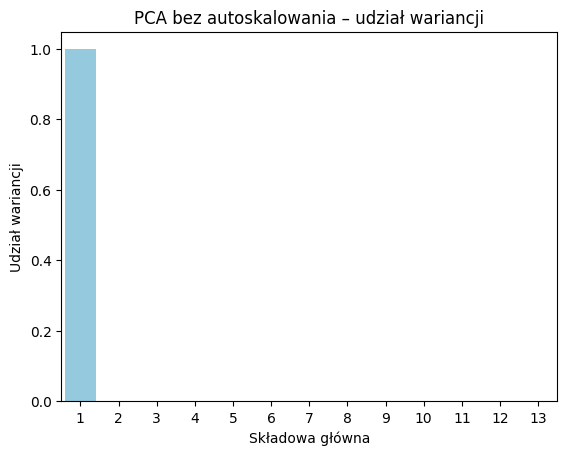

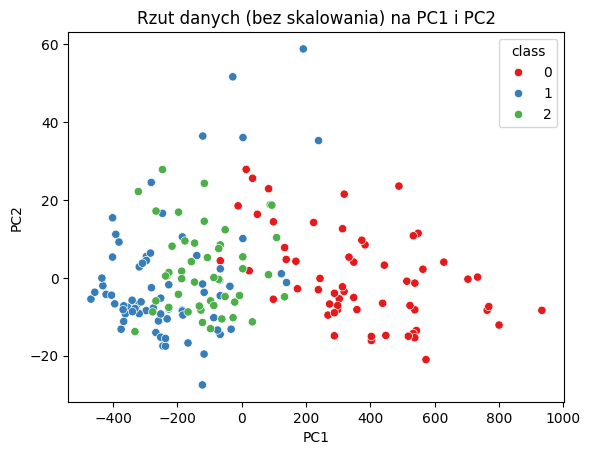

In [6]:
# =============================
# 2. PCA bez autoskalowania
# =============================
pca_raw = PCA()
PC_raw = pca_raw.fit_transform(X)

print("\nPCA bez skalowania – opis zmienności (%):")
print(np.round(100 * pca_raw.explained_variance_ratio_, 2))

sns.barplot(
    x=np.arange(1, len(pca_raw.explained_variance_ratio_) + 1),
    y=pca_raw.explained_variance_ratio_,
    color='skyblue'
)
plt.title("PCA bez autoskalowania – udział wariancji")
plt.xlabel("Składowa główna")
plt.ylabel("Udział wariancji")
plt.show()

# Rzut na PC1 i PC2
sns.scatterplot(x=PC_raw[:,0], y=PC_raw[:,1], hue=y, palette='Set1')
plt.title("Rzut danych (bez skalowania) na PC1 i PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

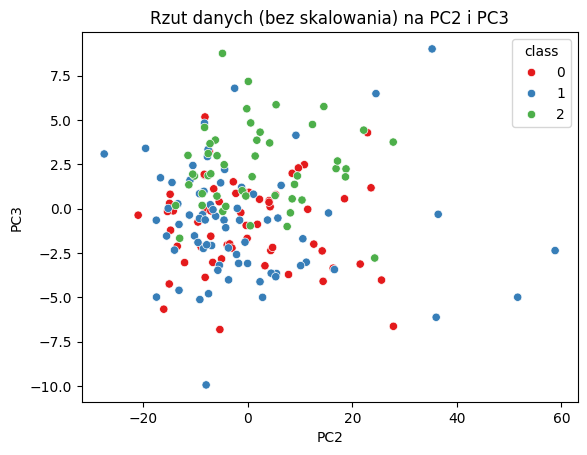

In [8]:
# Rzut na PC2 i PC3
sns.scatterplot(x=PC_raw[:,1], y=PC_raw[:,2], hue=y, palette='Set1')
plt.title("Rzut danych (bez skalowania) na PC2 i PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()


PCA z autoskalowaniem – opis zmienności (%):
[36.2  19.21 11.12  7.07  6.56  4.94  4.24  2.68  2.22  1.93  1.74  1.3
  0.8 ]


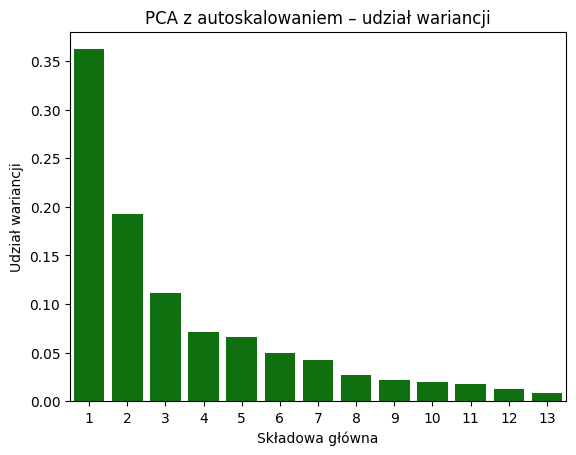

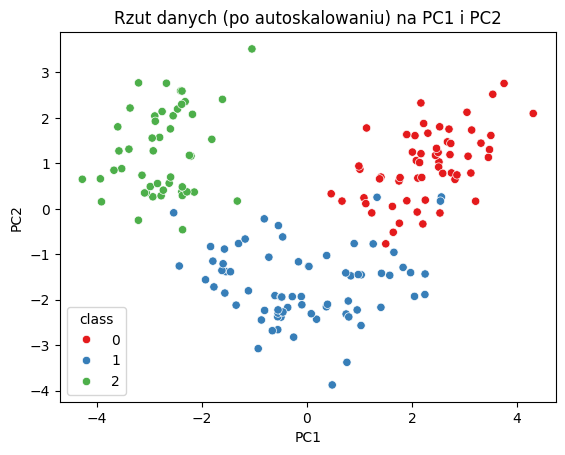

In [9]:
# =============================
# 3. PCA z autoskalowaniem
# =============================
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca_scaled = PCA()
PC_scaled = pca_scaled.fit_transform(X_scaled)

print("\nPCA z autoskalowaniem – opis zmienności (%):")
print(np.round(100 * pca_scaled.explained_variance_ratio_, 2))

sns.barplot(
    x=np.arange(1, len(pca_scaled.explained_variance_ratio_) + 1),
    y=pca_scaled.explained_variance_ratio_,
    color='green'
)
plt.title("PCA z autoskalowaniem – udział wariancji")
plt.xlabel("Składowa główna")
plt.ylabel("Udział wariancji")
plt.show()

# Rzut na PC1 i PC2 po skalowaniu
sns.scatterplot(x=PC_scaled[:,0], y=PC_scaled[:,1], hue=y, palette='Set1')
plt.title("Rzut danych (po autoskalowaniu) na PC1 i PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

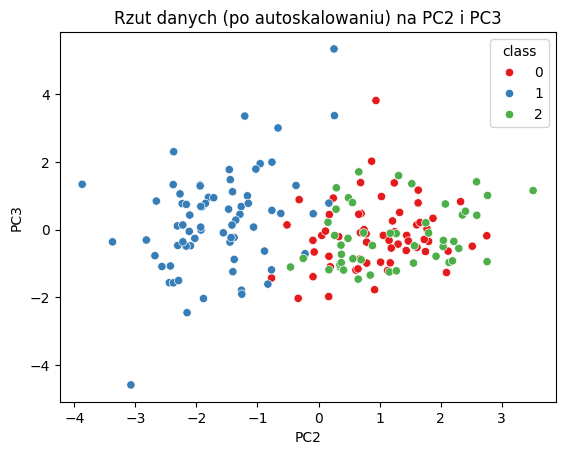

In [10]:
# Rzut na PC2 i PC3 po skalowaniu
sns.scatterplot(x=PC_scaled[:,1], y=PC_scaled[:,2], hue=y, palette='Set1')
plt.title("Rzut danych (po autoskalowaniu) na PC2 i PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()


Skumulowany udział wariancji (bez skalowania):
 [0.998 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.   ]
Skumulowany udział wariancji (z autoskalowaniem):
 [0.362 0.554 0.665 0.736 0.802 0.851 0.893 0.92  0.942 0.962 0.979 0.992
 1.   ]


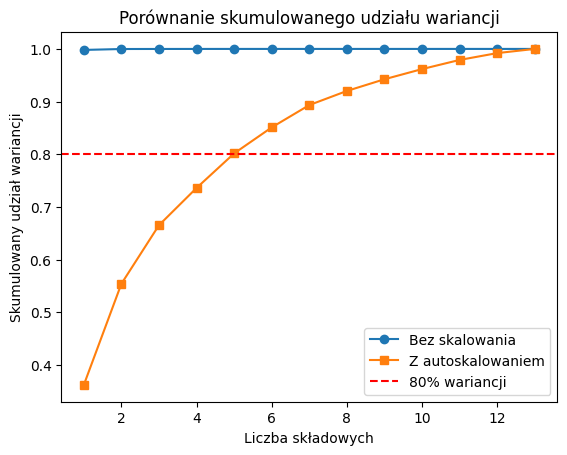

In [11]:
# =============================
# 4. Porównanie liczby istotnych składowych
# =============================
# Kryterium: suma wariancji >= 80%
cum_var_raw = np.cumsum(pca_raw.explained_variance_ratio_)
cum_var_scaled = np.cumsum(pca_scaled.explained_variance_ratio_)

print("\nSkumulowany udział wariancji (bez skalowania):\n", np.round(cum_var_raw, 3))
print("Skumulowany udział wariancji (z autoskalowaniem):\n", np.round(cum_var_scaled, 3))

plt.plot(np.arange(1, len(cum_var_raw)+1), cum_var_raw, label='Bez skalowania', marker='o')
plt.plot(np.arange(1, len(cum_var_scaled)+1), cum_var_scaled, label='Z autoskalowaniem', marker='s')
plt.axhline(0.8, color='red', linestyle='--', label='80% wariancji')
plt.title("Porównanie skumulowanego udziału wariancji")
plt.xlabel("Liczba składowych")
plt.ylabel("Skumulowany udział wariancji")
plt.legend()
plt.show()

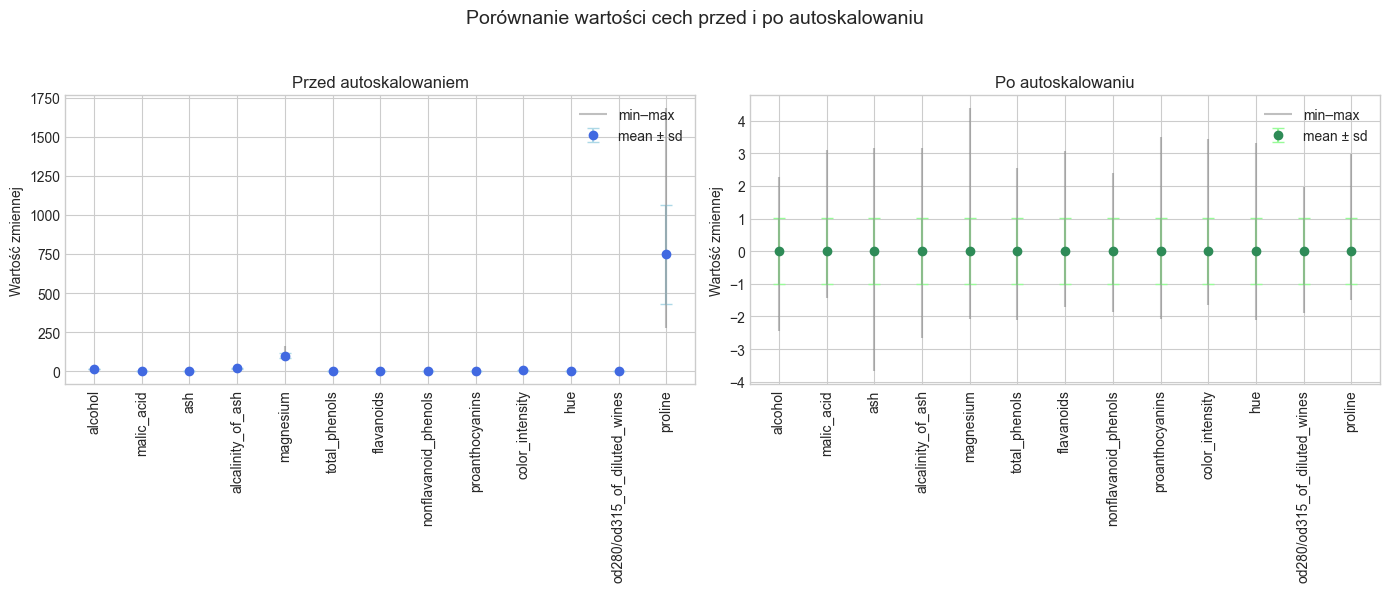

In [12]:
# =============================================
#  Porównanie wartości cech przed i po autoskalowaniu
# =============================================

# Statystyki przed i po autoskalowaniu
stats_raw = pd.DataFrame({
    'mean': X.mean(),
    'std': X.std(),
    'min': X.min(),
    'max': X.max()
})

X_scaled = pd.DataFrame(
    sc.fit_transform(X),
    columns=X.columns
)

stats_scaled = pd.DataFrame({
    'mean': X_scaled.mean(),
    'std': X_scaled.std(),
    'min': X_scaled.min(),
    'max': X_scaled.max()
})

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Indeksy dla osi X
x_pos = np.arange(len(stats_raw.index))

# --- wykres 1: dane surowe ---
axes[0].errorbar(
    x=x_pos,
    y=stats_raw['mean'],
    yerr=stats_raw['std'],
    fmt='o', color='royalblue', ecolor='lightblue', capsize=4, label='mean ± sd'
)
axes[0].vlines(x=x_pos, ymin=stats_raw['min'], ymax=stats_raw['max'],
               color='gray', alpha=0.5, label='min–max')
axes[0].set_title("Przed autoskalowaniem")
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(stats_raw.index, rotation=90)
axes[0].set_ylabel("Wartość zmiennej")
axes[0].legend()

# --- wykres 2: dane po autoskalowaniu ---
axes[1].errorbar(
    x=x_pos,
    y=stats_scaled['mean'],
    yerr=stats_scaled['std'],
    fmt='o', color='seagreen', ecolor='palegreen', capsize=4, label='mean ± sd'
)
axes[1].vlines(x=x_pos, ymin=stats_scaled['min'], ymax=stats_scaled['max'],
               color='gray', alpha=0.5, label='min–max')
axes[1].set_title("Po autoskalowaniu")
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(stats_scaled.index, rotation=90)
axes[1].set_ylabel("Wartość zmiennej")
axes[1].legend()

plt.suptitle("Porównanie wartości cech przed i po autoskalowaniu", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()